In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn.plotting import plot_stat_map
cut_coords = [0, 0, 0]

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mfx_glm = nib.load('results/mfx_glm_thresh_z.nii.gz')
rfx_glm = nib.load('results/rfx_glm_z.nii.gz')
z_mfx = nib.load('results/stouffers_rfx_z.nii.gz')
con_perm = nib.load('results/contrast_perm_z.nii.gz')
z_perm = nib.load('results/z_perm_z.nii.gz')
ffx_glm = nib.load('results/ffx_glm_z.nii.gz')
fishers = nib.load('results/fishers_z.nii.gz')
stouffers = nib.load('results/stouffers_ffx_z.nii.gz')
weighted_stouffers = nib.load('results/stouffers_weighted_z.nii.gz')
mkda_chi2_fdr = nib.load('results/mkda_chi2_fdr_consistency_z_FDR.nii.gz')
mkda_chi2_fwe = nib.load('results/mkda_chi2_fwe_consistency_z_FWE.nii.gz')
mkda_density = nib.load('results/mkda_density_vfwe.nii.gz')
ale = nib.load('results/ale_z_vfwe.nii.gz')
scale = nib.load('results/scale_z.nii.gz')
kda = nib.load('results/kda_vfwe.nii.gz')

thr = 1.96  # two-tailed tests
thr2 = 1.65  # one-tailed tests

## Image-based meta-analyses

In [3]:
'''
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 12))

plot_stat_map(mfx_glm,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[0, 0],
              title="MFX GLM")
plot_stat_map(rfx_glm, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[0, 1],
              title="RFX GLM")
plot_stat_map(z_mfx, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[0, 2],
              title="Z MFX")
plot_stat_map(con_perm, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[1, 0],
              title="Contrast Permutation")
plot_stat_map(z_perm, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[1, 1],
              title="Z Permutation")
plot_stat_map(ffx_glm, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[1, 2],
              title="FFX GLM")
plot_stat_map(fishers, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[2, 0],
              title="Fisher's")
plot_stat_map(stouffers, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[2, 1],
              title="Stouffer's")
plot_stat_map(weighted_stouffers, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[2, 2],
              title="Weighted Stouffer's")
fig.suptitle('Image-based meta-analyses', fontsize=24, y=0.95)
fig.savefig('figures/ibmas.png', dpi=400, bbox_inches='tight')
'''

'\nfig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 12))\n\nplot_stat_map(mfx_glm,\n              cut_coords=cut_coords, draw_cross=False,\n              cmap=\'RdBu_r\', axes=axes[0, 0],\n              title="MFX GLM")\nplot_stat_map(rfx_glm, threshold=thr,\n              cut_coords=cut_coords, draw_cross=False,\n              cmap=\'RdBu_r\', axes=axes[0, 1],\n              title="RFX GLM")\nplot_stat_map(z_mfx, threshold=thr,\n              cut_coords=cut_coords, draw_cross=False,\n              cmap=\'RdBu_r\', axes=axes[0, 2],\n              title="Z MFX")\nplot_stat_map(con_perm, threshold=thr,\n              cut_coords=cut_coords, draw_cross=False,\n              cmap=\'RdBu_r\', axes=axes[1, 0],\n              title="Contrast Permutation")\nplot_stat_map(z_perm, threshold=thr,\n              cut_coords=cut_coords, draw_cross=False,\n              cmap=\'RdBu_r\', axes=axes[1, 1],\n              title="Z Permutation")\nplot_stat_map(ffx_glm, threshold=thr,\n              

In [4]:
"""fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 8))
plot_stat_map(mkda_chi2_fdr, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[0, 0],
              title="MKDA Chi2 Analysis with FDR")
plot_stat_map(mkda_chi2_fwe, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[0, 1],
              title="MKDA Chi2 Analysis with FWE")
plot_stat_map(mkda_density,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[0, 2],
              title="MKDA Density Analysis")
plot_stat_map(ale, threshold=thr2,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[1, 0],
              title="ALE")
plot_stat_map(scale, threshold=thr2,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[1, 1],
              title="SCALE")
plot_stat_map(kda,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[1, 2],
              title="KDA Density Analysis")
fig.suptitle('Coordinate-based meta-analyses', fontsize=24)
fig.savefig('figures/cbmas.png', dpi=400, bbox_inches='tight')"""

'fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 8))\nplot_stat_map(mkda_chi2_fdr, threshold=thr,\n              cut_coords=cut_coords, draw_cross=False,\n              cmap=\'RdBu_r\', axes=axes[0, 0],\n              title="MKDA Chi2 Analysis with FDR")\nplot_stat_map(mkda_chi2_fwe, threshold=thr,\n              cut_coords=cut_coords, draw_cross=False,\n              cmap=\'RdBu_r\', axes=axes[0, 1],\n              title="MKDA Chi2 Analysis with FWE")\nplot_stat_map(mkda_density,\n              cut_coords=cut_coords, draw_cross=False,\n              cmap=\'RdBu_r\', axes=axes[0, 2],\n              title="MKDA Density Analysis")\nplot_stat_map(ale, threshold=thr2,\n              cut_coords=cut_coords, draw_cross=False,\n              cmap=\'RdBu_r\', axes=axes[1, 0],\n              title="ALE")\nplot_stat_map(scale, threshold=thr2,\n              cut_coords=cut_coords, draw_cross=False,\n              cmap=\'RdBu_r\', axes=axes[1, 1],\n              title="SCALE")\nplot_stat_ma

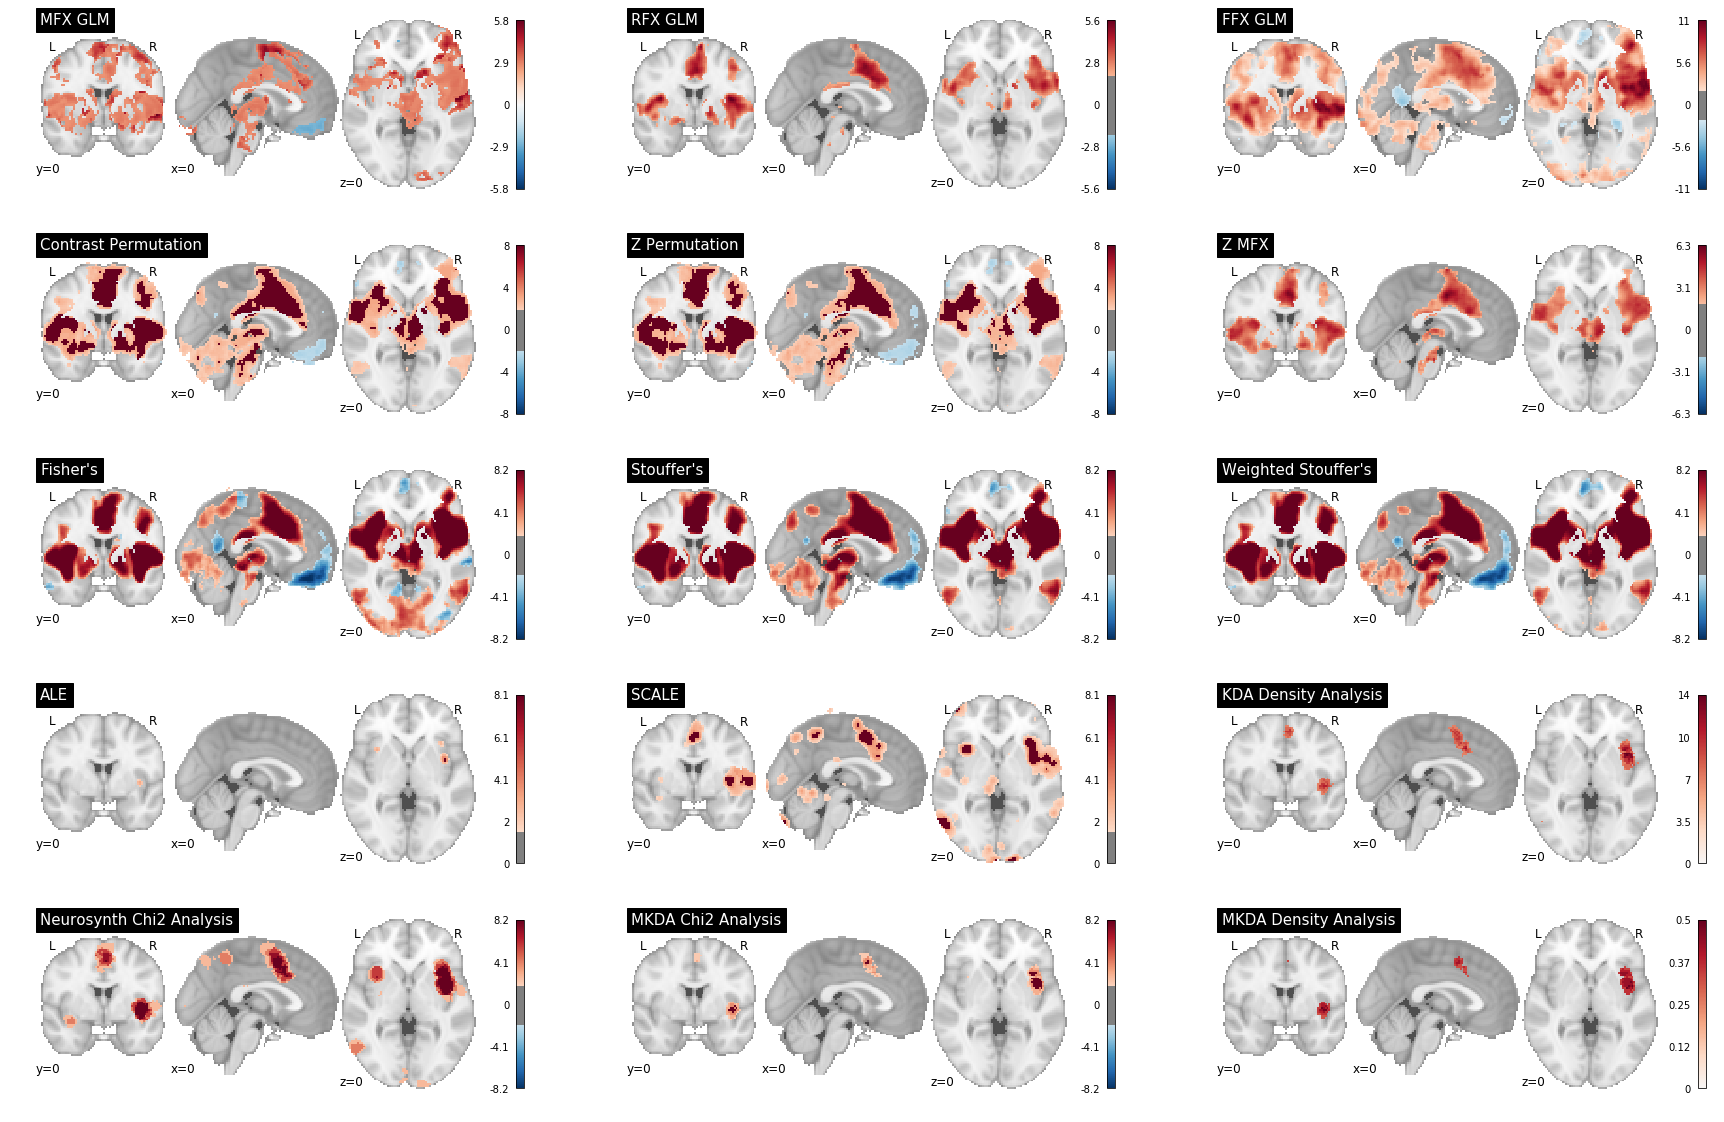

In [5]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))
plot_stat_map(mfx_glm,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[0, 0],
              title="MFX GLM")
plot_stat_map(rfx_glm, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[0, 1],
              title="RFX GLM")
plot_stat_map(ffx_glm, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[0, 2],
              title="FFX GLM")

plot_stat_map(con_perm, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[1, 0],
              title="Contrast Permutation")
plot_stat_map(z_perm, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[1, 1],
              title="Z Permutation")
plot_stat_map(z_mfx, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[1, 2],
              title="Z MFX")

plot_stat_map(fishers, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[2, 0],
              title="Fisher's")
plot_stat_map(stouffers, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[2, 1],
              title="Stouffer's")
plot_stat_map(weighted_stouffers, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[2, 2],
              title="Weighted Stouffer's")


plot_stat_map(ale, threshold=thr2,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[3, 0],
              title="ALE")
plot_stat_map(scale, threshold=thr2,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[3, 1],
              title="SCALE")
plot_stat_map(kda,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[3, 2],
              title="KDA Density Analysis")

plot_stat_map(mkda_chi2_fdr, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[4, 0],
              title="Neurosynth Chi2 Analysis")
plot_stat_map(mkda_chi2_fwe, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[4, 1],
              title="MKDA Chi2 Analysis")
plot_stat_map(mkda_density,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[4, 2],
              title="MKDA Density Analysis")

#fig.suptitle('Meta-analyses', fontsize=40, y=0.925)
fig.savefig('figures/metas.png', dpi=400, bbox_inches='tight')

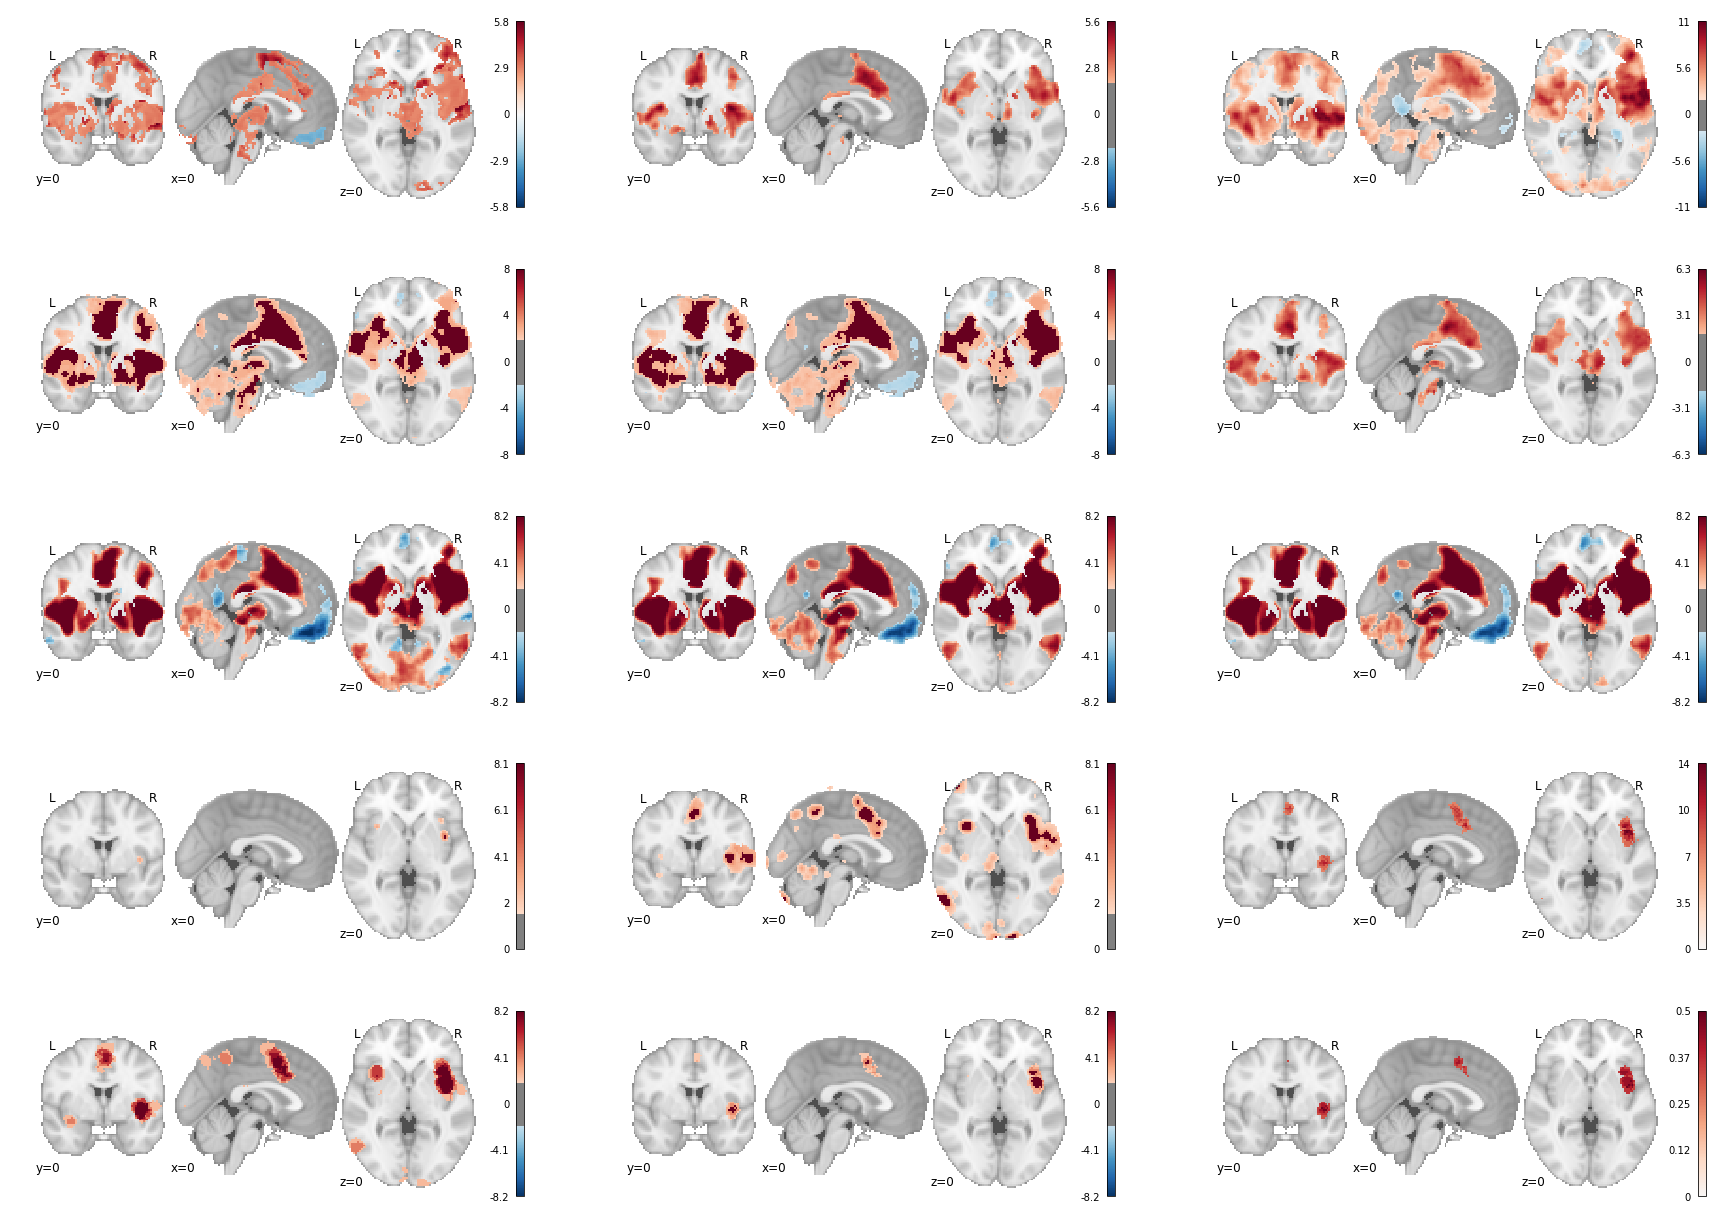

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30, 22))
plot_stat_map(mfx_glm,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[0, 0])
plot_stat_map(rfx_glm, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[0, 1])
plot_stat_map(ffx_glm, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[0, 2])

plot_stat_map(con_perm, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[1, 0])
plot_stat_map(z_perm, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[1, 1])
plot_stat_map(z_mfx, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[1, 2])

plot_stat_map(fishers, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[2, 0])
plot_stat_map(stouffers, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[2, 1])
plot_stat_map(weighted_stouffers, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[2, 2])


plot_stat_map(ale, threshold=thr2,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[3, 0])
plot_stat_map(scale, threshold=thr2,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[3, 1])
plot_stat_map(kda,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[3, 2])

plot_stat_map(mkda_chi2_fdr, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[4, 0])
plot_stat_map(mkda_chi2_fwe, threshold=thr,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[4, 1])
plot_stat_map(mkda_density,
              cut_coords=cut_coords, draw_cross=False,
              cmap='RdBu_r', axes=axes[4, 2])

#fig.suptitle('Meta-analyses', fontsize=40, y=0.925)
fig.savefig('figures/metas_unlabeled.png', dpi=400, bbox_inches='tight')